In [1]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [2]:
# daatset api
!kaggle competitions download -c cifar-10

100% 713M/715M [00:31<00:00, 23.9MB/s]
100% 715M/715M [00:31<00:00, 23.8MB/s]


In [3]:
!ls

cifar-10.zip  kaggle.json  sample_data


Extral all the zip and 7z file


In [4]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/cifar-10.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
!ls

cifar-10.zip  sample_data	    test.7z  train.7z
kaggle.json   sampleSubmission.csv  train    trainLabels.csv


In [7]:
!pip install py7zr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 90.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 399.3/399.3 kB 48.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.8/138.8 kB 22.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.8/49.8 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 33.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 14.1 MB/s eta 0:00:00


In [8]:
import py7zr

archive = py7zr.SevenZipFile('/content/train.7z', mode='r')
archive.extractall()     #archive.extractall(path='/content/Training Data')
archive.close()

In [ ]:
!ls

cifar-10.zip  sample_data	    test.7z  train.7z
kaggle.json   sampleSubmission.csv  train    trainLabels.csv


Importing the all the library dependencies

In [9]:
import os 
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.image  as mpimg
from PIL import Image
from sklearn.model_selection import train_test_split
import pandas as pd 

In [ ]:
filenames = os.listdir('/content/train')
print(type(filenames))
print(len(filenames))

In [10]:
print(filenames[0:5]) # show the first 5 file 
print(filenames[-5:]) #show the last 5 file 

NameError: ignored

Label processing 

In [22]:
label_df = pd.read_csv('trainLabels.csv')
print(label_df)
print('label_df shape',label_df.shape)

          id       label
0          1        frog
1          2       truck
2          3       truck
3          4        deer
4          5  automobile
...      ...         ...
49995  49996        bird
49996  49997        frog
49997  49998       truck
49998  49999  automobile
49999  50000  automobile

[50000 rows x 2 columns]
label_df shape (50000, 2)


In [23]:
(label_df[label_df['id']==775])

,id,label
774,775,cat


In [24]:
print(label_df.head(10))
print('\n')
print(label_df.tail(10))

   id       label
0   1        frog
1   2       truck
2   3       truck
3   4        deer
4   5  automobile
5   6  automobile
6   7        bird
7   8       horse
8   9        ship
9  10         cat


          id       label
49990  49991        deer
49991  49992        bird
49992  49993    airplane
49993  49994  automobile
49994  49995    airplane
49995  49996        bird
49996  49997        frog
49997  49998       truck
49998  49999  automobile
49999  50000  automobile


In [25]:
label_df['label'].value_counts()

frog          5000
truck         5000
deer          5000
automobile    5000
bird          5000
horse         5000
ship          5000
cat           5000
dog           5000
airplane      5000
Name: label, dtype: int64

In [26]:
labels_dictionary = {'airplane':0, 'automobile':1, 'bird':2, 'cat':3, 'deer':4, 'dog':5, 'frog':6, 'horse':7, 'ship':8, 'truck':9}
labels =  [labels_dictionary[i] for i in label_df['label']]
print(labels[0:5])
print(labels[-5:])

[6, 9, 9, 4, 1]
[2, 6, 9, 1, 1]


Displaying the sample image 

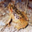

In [27]:
import cv2 
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/train/7796.png')
cv2_imshow(img)

In [28]:
label_df[label_df['id']==7796]

,id,label
7795,7796,frog


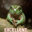

,id,label
4999,5000,frog


In [29]:
img = cv2.imread('/content/train/5000.png')
cv2_imshow(img)
label_df[label_df['id']==5000]

In [30]:
id_list = list(label_df['id'])
print(id_list[0:5])
print(id_list[-5:])

[1, 2, 3, 4, 5]
[49996, 49997, 49998, 49999, 50000]


Image processing 

In [31]:
# convert image to the numpy arrays 
train_data_folder = '/content/train/'


for id in id_list:
  img_path = train_data_folder + str(id) + '.png'
  print(img_path)
  if id >= 5:
      break

/content/train/1.png
/content/train/2.png
/content/train/3.png
/content/train/4.png
/content/train/5.png


In [32]:
data = []
for id in id_list:
  image = Image.open(train_data_folder + str(id) + '.png')
  image = np.array(image)
  data.append(image)


In [33]:
print(type(data))
print(len(data))

<class 'list'>
50000


In [34]:
print("type of each data",type(data[0]))
print('shape of each data ',data[0].shape)

type of each data <class 'numpy.ndarray'>
shape of each data  (32, 32, 3)


In [ ]:
data[0]

In [35]:
# convert the images and label into numpy arrays 
x = np.array(data)
y = np.array(labels)

In [ ]:
print("type of x ",type(x))
print('type of y ',type(y))

type of x  <class 'numpy.ndarray'>
type of y  <class 'numpy.ndarray'>


In [ ]:
print('shape of x ',x.shape)
print('shape of y ',y.shape)

shape of x  (50000, 32, 32, 3)
shape of y  (50000,)


train test split 

In [36]:
x_train ,x_test, y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 2)
print("x shape ",x.shape)
print("x_train shape ",x_train.shape)
print("x_test shape ",x_test.shape)
print('\n\n')
print("y shape ",y.shape)
print("y_train shape ",y_train.shape)
print("y_test shape ",y_test.shape)

x shape  (50000, 32, 32, 3)
x_train shape  (40000, 32, 32, 3)
x_test shape  (10000, 32, 32, 3)



y shape  (50000,)
y_train shape  (40000,)
y_test shape  (10000,)


Scaling the data 

In [37]:
x_train_scaled = x_train/255
x_test_scaled = x_test/255
print("x_train before scaling ",x_train[0])
print("x_train after scaling ",x_train_scaled[0].round(2))

x_train before scaling  [[[209 210 203]
  [213 214 209]
  [218 219 215]
  ...
  [127  74  39]
  [122  68  35]
  [116  63  32]]

 [[210 210 202]
  [213 214 207]
  [218 220 214]
  ...
  [124  70  35]
  [121  67  33]
  [123  69  36]]

 [[206 205 195]
  [209 209 202]
  [213 215 209]
  ...
  [124  70  37]
  [131  77  42]
  [131  78  41]]

 ...

 [[127 108  97]
  [138 122 110]
  [141 127 118]
  ...
  [158 149 134]
  [161 156 151]
  [136 137 148]]

 [[145 130 119]
  [148 135 128]
  [136 127 128]
  ...
  [175 174 172]
  [160 161 170]
  [143 148 164]]

 [[138 128 123]
  [140 132 136]
  [136 131 140]
  ...
  [150 154 169]
  [145 149 166]
  [140 145 163]]]
x_train after scaling  [[[0.82 0.82 0.8 ]
  [0.84 0.84 0.82]
  [0.85 0.86 0.84]
  ...
  [0.5  0.29 0.15]
  [0.48 0.27 0.14]
  [0.45 0.25 0.13]]

 [[0.82 0.82 0.79]
  [0.84 0.84 0.81]
  [0.85 0.86 0.84]
  ...
  [0.49 0.27 0.14]
  [0.47 0.26 0.13]
  [0.48 0.27 0.14]]

 [[0.81 0.8  0.76]
  [0.82 0.82 0.79]
  [0.84 0.84 0.82]
  ...
  [0.49 0.27 0.1

Building the CNN model 

In [38]:
import tensorflow as tf
from tensorflow import keras 
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout

In [ ]:
from keras.engine.sequential import Sequential
model = Sequential()
#1st layer 
model.add(Conv2D(32,kernel_size =(3,3),activation='relu',input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2,2)))


#2nd layer
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

#flatten layer 
model.add(Flatten())

#Dense layer 
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation= 'relu'))
model.add(Dropout(0.5))

model.add(Dense(10,activation='softmax'))

In [ ]:
#compile the model
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
x_train_scaled_reshape = x_train_scaled.reshape(-1,32,32,3)
tf.config.experimental_run_functions_eagerly(True)
history = model.fit(x_train_scaled_reshape,
                    y_train,
                    validation_split=0.1,
                    epochs=10)

Instructions for updating:
Use `tf.config.run_functions_eagerly` instead of the experimental version.
/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/10


KeyboardInterrupt: ignored

In [ ]:
num_of_classes = 10

# setting up the layers of Neural Network

model = keras.Sequential([
    
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(num_of_classes, activation='softmax')
])
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])
# training the neural network
model.fit(x_train_scaled, y_train, validation_split=0.1, epochs=5)

RestNet50

In [11]:
import tensorflow
from tensorflow.keras import Sequential,models,layers,optimizers
from tensorflow.keras.layers import Dense,Dropout,Flatten,BatchNormalization
from tensorflow.keras.models import load_model,Model
from tensorflow.keras.applications.resnet50 import ResNet50


In [12]:
CNN_base = ResNet50(weights = 'imagenet',
                            include_top= False,
                    input_shape=(256,256,3) )
CNN_base.summary()

94765736/94765736 [==============================] - 5s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                          

In [40]:
res_model = models.Sequential()
res_model.add(layers.UpSampling2D((2,2))) 
res_model.add(layers.UpSampling2D((2,2))) 
res_model.add(layers.UpSampling2D((2,2))) 

res_model.add(CNN_base)

res_model.add(layers.Flatten())

res_model.add(layers.BatchNormalization())
res_model.add(layers.Dense(128,activation ='relu'))
res_model.add(layers.Dropout(0.5))

res_model.add(layers.BatchNormalization())
res_model.add(layers.Dense(64,activation ='relu'))
res_model.add(layers.Dropout(0.5))

res_model.add(layers.BatchNormalization())
res_model.add(layers.Dense(10,activation ='softmax'))


# compile the resnetmodel resmodel
res_model.compile(optimizer=optimizers.RMSprop(lr=2e-5), loss='sparse_categorical_crossentropy', metrics=['acc'])

In [41]:
#x_train_scaled_reshape = np.reshape(x_train_scaled,[-1,32,32,3])
history = res_model.fit(x_train_scaled, y_train, validation_split=0.1, epochs=5)

Epoch 1/5
1125/1125 [==============================] - 479s 392ms/step - loss: 2.4154 - acc: 0.1316 - val_loss: 2.1901 - val_acc: 0.1758
Epoch 2/5
1125/1125 [==============================] - 442s 393ms/step - loss: 2.0197 - acc: 0.2410 - val_loss: 2.1993 - val_acc: 0.2695
Epoch 3/5
1125/1125 [==============================] - 438s 390ms/step - loss: 1.6041 - acc: 0.3978 - val_loss: 1.3907 - val_acc: 0.4908
Epoch 4/5
1125/1125 [==============================] - 445s 396ms/step - loss: 1.3658 - acc: 0.5139 - val_loss: 1.4035 - val_acc: 0.4810
Epoch 5/5
1125/1125 [==============================] - 446s 396ms/step - loss: 1.1863 - acc: 0.5888 - val_loss: 1.0241 - val_acc: 0.6317


In [42]:
loss, accuracy = res_model.evaluate(x_test_scaled, x_test)
print('Test Accuracy =', accuracy)

InvalidArgumentError: ignored

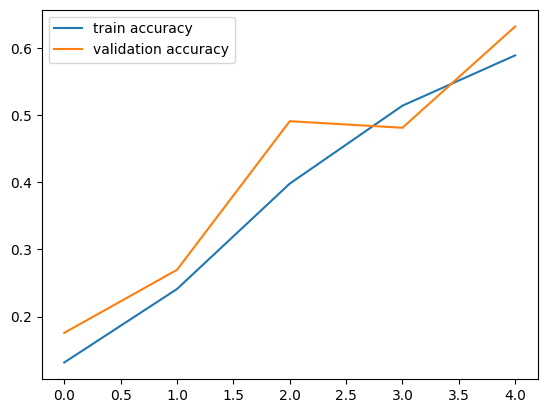

In [43]:
h = history
plt.plot(h.history['acc'],label = 'train accuracy ')
plt.plot(h.history['val_acc'],label= 'validation accuracy')
plt.legend()
plt.show()

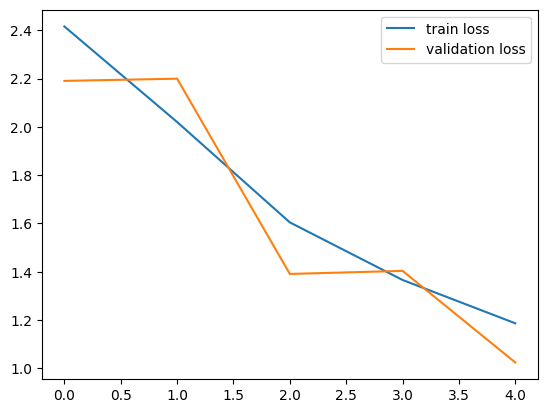

In [44]:
h = history
plt.plot(h.history['loss'],label = 'train loss ')
plt.plot(h.history['val_loss'],label= 'validation loss')
plt.legend()
plt.show()

In [46]:
model_deploy=res_model.save('/content/drive/MyDrive/Deep learning Save model/Cifar_10_object_detection_using_resnet50.h5')